In [ ]:
!pip install tensorflow_datasets
!pip install 'tensorflow-text'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 22.4 MB/s 
     |████████████████████████████████| 588.3 MB 16 kB/s 
     |████████████████████████████████| 1.7 MB 51.0 MB/s 
     |████████████████████████████████| 439 kB 61.6 MB/s 
     |████████████████████████████████| 6.0 MB 45.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstal

In [ ]:
import collections
import os
import pathlib
import re
import string
import sys
import tempfile
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_text as text
import pandas as pd
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import keras
import logging


ModuleNotFoundError: ignored

In [ ]:
logging.getLogger('tensorflow').setLevel(logging.ERROR)  

In [ ]:
dataset = pd.read_csv("drive/MyDrive/MajorProjectPseudoCodeCpp/spoc_cleaned_next.csv")

In [ ]:
from collections import Counter

In [ ]:
Counter(" ".join(dataset["code"]).split()).most_common(20)

[('=', 74274),
 ('}', 63410),
 ('<<', 54059),
 ('{', 53444),
 ('>>', 38312),
 ('0;', 37834),
 ('i', 37291),
 ('int', 34903),
 ('if', 33273),
 ('cout', 27813),
 ('for', 23825),
 ('cin', 23000),
 ('==', 21545),
 ('<', 20407),
 ('endl;', 20279),
 ('n;', 19468),
 ('-', 18759),
 ('(int', 18328),
 ('long', 18220),
 ('+', 17804)]

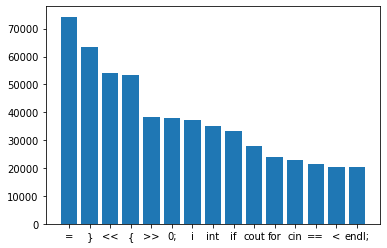

In [ ]:
a = Counter(" ".join(dataset["code"]).split()).most_common(15)
plt.bar(*zip(*a))
plt.show()

In [ ]:
Counter(" ".join(dataset["pseudocode"]).split()).most_common(15)

[('to', 59188),
 ('=', 57262),
 ('n', 35260),
 ('if', 34218),
 ('is', 32908),
 ('0', 31461),
 ('print', 31059),
 ('and', 30373),
 ('i', 26715),
 ('read', 25436),
 ('for', 22388),
 ('a', 22152),
 ('1', 22132),
 ('of', 21589),
 ('set', 17934)]

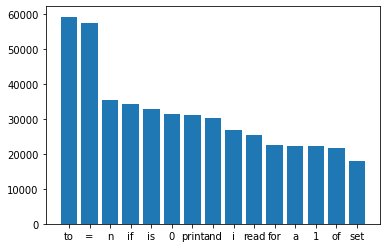

In [ ]:
a = Counter(" ".join(dataset["pseudocode"]).split()).most_common(15)
plt.bar(*zip(*a))
plt.show()

In [ ]:
dataset.sample(frac=1).reset_index(drop=True)
train_examples = dataset[2000:]
val_examples = dataset[:2000]
# test_examples = dataset[12000:]

In [ ]:
dataset.head()

,pseudocode,code
0,if b=1 return a_ else call function gcd(b_ a%b...,return !b ? a : gcd(b_ a % b); } int mai...
1,let a and b be strings n = integer st = ...,string a_ b; int n; set<string> st; c...
2,declare integers n_ m_ su = 0_ su2 = 0_ a_ b a...,int n_ m_ su = 0_ su2 = 0_ a_ b_ c; cin >> ...
3,if a is 0_ return b from function return re...,if (a == 0) return b; return gcd1(b % a_ a)...
4,create map iterator it from string to integer ...,map<string_ int>::iterator it; int main() {...


In [ ]:
len(train_examples)

12547

In [ ]:
def dataset_to_tensor(data_examples):
  data_prob = []
  for i in range(0,len(data_examples)):
    temp = str(data_examples.iloc[i,0])
    tempval = temp.replace('_',',')
    data_prob.append(tempval)

  # inputs = data_examples['problem']
  print(data_prob[0])
  print(type(data_prob))

  data_sol = []
  for i in range(0,len(data_examples)):
    temp = str(data_examples.iloc[i,1])
    tempval = temp.replace('_',',')
    data_sol.append(tempval)

  # inputs = data_examples['solution']
  print(data_sol[0])
  print(type(data_sol))

  tensor_prob = tf.convert_to_tensor(data_prob)
  tensor_sol = tf.convert_to_tensor(data_sol)

  tensor_data = tf.data.Dataset.from_tensor_slices((tensor_prob,tensor_sol))

  # tf.data.experimental.cardinality(tensor_data)
  return tensor_data, tensor_prob, tensor_sol;

In [ ]:
val_data , prob_tensr, sol_tensr = dataset_to_tensor(val_examples)
train_data, train_p, train_s = dataset_to_tensor(train_examples)

if b=1 return a, else call function gcd(b, a%b)            n , nn, ans = integers with ans =0    Read n    for i=2 to n-1 execute    set nn to n    while nn is not equal to 0, set ans to ans + nn%i, and also set nn= nn/i        set o to gcd(ans, n-2)    print out ans/o "/" (n-2)/o            function gcd with integer arguments a and b    return !b ? a : gcd(b, a % b)            integers n, nn and ans = 0    read n    for i = 2 to n - 1 inclusive    set nn to n    while nn increment ans by (nn % i) and set nn to nn / i;        integer o = gcd of ans and n - 2    print ans / o, "/", (n - 2) / o and "\n"            
<class 'list'>
return !b ? a : gcd(b, a % b);    }    int main() {    int n, nn, ans = 0;    cin >> n;    for (int i = 2; i <= n - 1; ++i) {    nn = n;    while (nn) ans += nn % i, nn /= i;    }    int o = gcd(ans, n - 2);    cout << ans / o << "/" << (n - 2) / o << "\n";    return 0;    }    int gcd(int a, int b) {    return !b ? a : gcd(b, a % b);    }    int main() {    int

In [ ]:
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

In [ ]:
bert_tokenizer_params=dict(lower_case=True)
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
    # The target vocabulary size
    vocab_size = 10000,
    # Reserved tokens that must be included in the vocabulary
    reserved_tokens=reserved_tokens,
    # Arguments for `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={},
)

In [ ]:
train_pb = tf.data.Dataset.from_tensor_slices(train_p)
train_sl = tf.data.Dataset.from_tensor_slices(train_s)

In [ ]:
%%time
prob_vocab = bert_vocab.bert_vocab_from_dataset(
    train_pb.batch(2000).prefetch(20),
    **bert_vocab_args
)
sol_vocab = bert_vocab.bert_vocab_from_dataset(
    train_sl.batch(2000).prefetch(20),
    **bert_vocab_args
)

CPU times: user 26.7 s, sys: 192 ms, total: 26.9 s
Wall time: 27.6 s


In [ ]:
print(prob_vocab[:10])
print(prob_vocab[100:110])
print(prob_vocab[1000:1010])
print(prob_vocab[-10:])
print()
print(sol_vocab[:10])
print(sol_vocab[100:110])
# print(sol_vocab[1000:1010])
print(sol_vocab[-10:])

['[PAD]', '[UNK]', '[START]', '[END]', '!', '"', '#', '$', '%', '&']
['newline', 'array', 'new', 'inclusive', 'while', 'loop', 'value', 'or', 'greater', 'less']
['large', 'marks', 'max3', 'mina', 'modulus', 'mx2', 'pointed', 'rep', 'sup', 'sx']
['##@', '##[', '##\\', '##]', '##^', '##`', '##{', '##|', '##}', '##~']

['[PAD]', '[UNK]', '[START]', '[END]', '!', '"', '#', '$', '%', '&']
['temp', 'abs', 's1', 'true', 'sort', 'push', 'vector', 'length', 'bool', 'back']
['##@', '##[', '##\\', '##]', '##^', '##`', '##{', '##|', '##}', '##~']


In [ ]:
def write_vocab_file(filepath, vocab):
  with open(filepath, 'w') as f:
    for token in vocab:
      print(token, file=f)

In [ ]:
write_vocab_file('prob_vocab.txt', prob_vocab)
write_vocab_file('sol_vocab.txt', sol_vocab)

In [ ]:
write_vocab_file('drive/MyDrive/MajorProjectPseudoCodeCpp/Tokenizer/prob_vocab.txt', prob_vocab)
write_vocab_file('drive/MyDrive/MajorProjectPseudoCodeCpp/Tokenizer/sol_vocab.txt', sol_vocab)

In [ ]:
!ls *.txt

prob_vocab.txt	sol_vocab.txt


In [ ]:
prob_tokenizer = text.BertTokenizer('/content/prob_vocab.txt', **bert_tokenizer_params)
sol_tokenizer = text.BertTokenizer('/content/sol_vocab.txt', **bert_tokenizer_params)


In [ ]:
for pb_examples in train_pb.batch(2).take(1):
  for ex in pb_examples:
    print(ex.numpy())
print()
for sol_examples in train_sl.batch(2).take(1):
  for ex in sol_examples:
    print(ex.numpy())

b'a = long long    m = map of int to int    for i = 0 to 4 exclusive    read a    increment m[a]        print 4 - m.size()        '
b'let a, b, c, d, e, f, g, h and i be integers    read a, b and c    multiply a, b and c and put result in d    set e = (a+b) * c    set f = a * (b+c)    set g = a + b * c    set h = a * b + c    set i = a + b +c    set d to maximum of d and e    set d to maximum of d and f    set d to maximum of d and g    set d to maximum of d and h    set d to maximum of d and i    print d            '

b'long long a;    map<int, int> m;    for (int i = 0; i < 4; i++) {    cin >> a;    m[a]++;    }    cout << 4 - m.size() << endl;    }    '
b'int a, b, c, d, e, f, g, h, i;    cin >> a >> b >> c;    d = a * b * c;    e = (a + b) * c;    f = a * (b + c);    g = a + b * c;    h = a * b + c;    i = a + b + c;    d = max(d, e);    d = max(d, f);    d = max(d, g);    d = max(d, h);    d = max(d, i);    cout << d << endl;    return 0;    }    '


In [ ]:
# Tokenize the examples -> (batch, word, word-piece)
token_batch_prob = prob_tokenizer.tokenize(pb_examples)
# Merge the word and word-piece axes -> (batch, tokens)
token_batch_prob = token_batch_prob.merge_dims(-2,-1)

for ex in token_batch_prob.to_list():
  print(ex)

[41, 32, 79, 79, 53, 32, 246, 78, 89, 71, 89, 77, 49, 32, 19, 71, 23, 84, 76, 41, 88, 53, 36, 41, 38, 74, 23, 16, 53, 17, 97, 11, 12]
[95, 41, 15, 42, 15, 43, 15, 44, 15, 45, 15, 46, 15, 47, 15, 48, 75, 49, 99, 96, 76, 41, 15, 42, 75, 43, 380, 41, 15, 42, 75, 43, 75, 798, 153, 119, 44, 80, 45, 32, 11, 41, 14, 42, 12, 13, 43, 80, 46, 32, 41, 13, 11, 42, 14, 43, 12, 80, 47, 32, 41, 14, 42, 13, 43, 80, 48, 32, 41, 13, 42, 14, 43, 80, 49, 32, 41, 14, 42, 14, 43, 80, 44, 71, 208, 78, 44, 75, 45, 80, 44, 71, 208, 78, 44, 75, 46, 80, 44, 71, 208, 78, 44, 75, 47, 80, 44, 71, 208, 78, 44, 75, 48, 80, 44, 71, 208, 78, 44, 75, 49, 74, 44]


In [ ]:


# Tokenize the examples -> (batch, word, word-piece)
token_batch_sol = sol_tokenizer.tokenize(sol_examples)
# Merge the word and word-piece axes -> (batch, tokens)
token_batch_sol = token_batch_sol.merge_dims(-2,-1)

for ex in token_batch_sol.to_list():
  print(ex)

[76, 76, 41, 30, 159, 31, 71, 15, 71, 33, 53, 30, 75, 11, 71, 49, 32, 19, 30, 49, 31, 23, 30, 49, 14, 14, 12, 67, 74, 33, 33, 41, 30, 53, 36, 41, 38, 14, 14, 30, 69, 73, 31, 31, 23, 16, 53, 17, 86, 11, 12, 31, 31, 77, 30, 69]
[71, 41, 15, 42, 15, 43, 15, 44, 15, 45, 15, 46, 15, 47, 15, 48, 15, 49, 30, 74, 33, 33, 41, 33, 33, 42, 33, 33, 43, 30, 44, 32, 41, 13, 42, 13, 43, 30, 45, 32, 11, 41, 14, 42, 12, 13, 43, 30, 46, 32, 41, 13, 11, 42, 14, 43, 12, 30, 47, 32, 41, 14, 42, 13, 43, 30, 48, 32, 41, 13, 42, 14, 43, 30, 49, 32, 41, 14, 42, 14, 43, 30, 44, 32, 89, 11, 44, 15, 45, 12, 30, 44, 32, 89, 11, 44, 15, 46, 12, 30, 44, 32, 89, 11, 44, 15, 47, 12, 30, 44, 32, 89, 11, 44, 15, 48, 12, 30, 44, 32, 89, 11, 44, 15, 49, 12, 30, 73, 31, 31, 44, 31, 31, 77, 30, 78, 19, 30, 69]


In [ ]:
# Lookup each token id in the vocabulary.
txt_tokens_prob = tf.gather(prob_vocab, token_batch_prob)
# Join with spaces.
tf.strings.reduce_join(txt_tokens_prob, separator=' ', axis=-1)



<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'a = long long m = map of int to int for i = 0 to 4 exclusive read a increment m [ a ] print 4 - m . size ( )',
       b'let a , b , c , d , e , f , g , h and i be integers read a , b and c multiply a , b and c and put result in d set e = ( a + b ) * c set f = a * ( b + c ) set g = a + b * c set h = a * b + c set i = a + b + c set d to maximum of d and e set d to maximum of d and f set d to maximum of d and g set d to maximum of d and h set d to maximum of d and i print d'],
      dtype=object)>

In [ ]:
prob_words = prob_tokenizer.detokenize(token_batch_prob)
tf.strings.reduce_join(prob_words, separator=' ', axis=-1)

sol_words = sol_tokenizer.detokenize(token_batch_sol)
tf.strings.reduce_join(sol_words, separator=' ', axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'long long a ; map < int , int > m ; for ( int i = 0 ; i < 4 ; i + + ) { cin > > a ; m [ a ] + + ; } cout < < 4 - m . size ( ) < < endl ; }',
       b'int a , b , c , d , e , f , g , h , i ; cin > > a > > b > > c ; d = a * b * c ; e = ( a + b ) * c ; f = a * ( b + c ) ; g = a + b * c ; h = a * b + c ; i = a + b + c ; d = max ( d , e ) ; d = max ( d , f ) ; d = max ( d , g ) ; d = max ( d , h ) ; d = max ( d , i ) ; cout < < d < < endl ; return 0 ; }'],
      dtype=object)>

In [ ]:
START = tf.argmax(tf.constant(reserved_tokens) == "[START]")
END = tf.argmax(tf.constant(reserved_tokens) == "[END]")

def add_start_end(ragged):
  count = ragged.bounding_shape()[0]
  starts = tf.fill([count,1], START)
  ends = tf.fill([count,1], END)
  return tf.concat([starts, ragged, ends], axis=1)

In [ ]:
prob_words = prob_tokenizer.detokenize(add_start_end(token_batch_prob))
tf.strings.reduce_join(prob_words, separator=' ', axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'[START] a = long long m = map of int to int for i = 0 to 4 exclusive read a increment m [ a ] print 4 - m . size ( ) [END]',
       b'[START] let a , b , c , d , e , f , g , h and i be integers read a , b and c multiply a , b and c and put result in d set e = ( a + b ) * c set f = a * ( b + c ) set g = a + b * c set h = a * b + c set i = a + b + c set d to maximum of d and e set d to maximum of d and f set d to maximum of d and g set d to maximum of d and h set d to maximum of d and i print d [END]'],
      dtype=object)>

In [ ]:
sol_words = sol_tokenizer.detokenize(add_start_end(token_batch_sol))
tf.strings.reduce_join(sol_words, separator=' ', axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'[START] long long a ; map < int , int > m ; for ( int i = 0 ; i < 4 ; i + + ) { cin > > a ; m [ a ] + + ; } cout < < 4 - m . size ( ) < < endl ; } [END]',
       b'[START] int a , b , c , d , e , f , g , h , i ; cin > > a > > b > > c ; d = a * b * c ; e = ( a + b ) * c ; f = a * ( b + c ) ; g = a + b * c ; h = a * b + c ; i = a + b + c ; d = max ( d , e ) ; d = max ( d , f ) ; d = max ( d , g ) ; d = max ( d , h ) ; d = max ( d , i ) ; cout < < d < < endl ; return 0 ; } [END]'],
      dtype=object)>

In [ ]:
def cleanup_text(reserved_tokens, token_txt):
  # Drop the reserved tokens, except for "[UNK]".
  bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
  bad_token_re = "|".join(bad_tokens)
    
  bad_cells = tf.strings.regex_full_match(token_txt, bad_token_re)
  result = tf.ragged.boolean_mask(token_txt, ~bad_cells)

  # Join them into strings.
  result = tf.strings.reduce_join(result, separator=' ', axis=-1)

  return result

In [ ]:
token_batch = sol_tokenizer.tokenize(sol_examples).merge_dims(-2,-1)
words =sol_tokenizer.detokenize(token_batch)
words

<tf.RaggedTensor [[b'long', b'long', b'a', b';', b'map', b'<', b'int', b',', b'int', b'>',
  b'm', b';', b'for', b'(', b'int', b'i', b'=', b'0', b';', b'i', b'<',
  b'4', b';', b'i', b'+', b'+', b')', b'{', b'cin', b'>', b'>', b'a', b';',
  b'm', b'[', b'a', b']', b'+', b'+', b';', b'}', b'cout', b'<', b'<', b'4',
  b'-', b'm', b'.', b'size', b'(', b')', b'<', b'<', b'endl', b';', b'}']   ,
 [b'int', b'a', b',', b'b', b',', b'c', b',', b'd', b',', b'e', b',', b'f',
  b',', b'g', b',', b'h', b',', b'i', b';', b'cin', b'>', b'>', b'a', b'>',
  b'>', b'b', b'>', b'>', b'c', b';', b'd', b'=', b'a', b'*', b'b', b'*',
  b'c', b';', b'e', b'=', b'(', b'a', b'+', b'b', b')', b'*', b'c', b';',
  b'f', b'=', b'a', b'*', b'(', b'b', b'+', b'c', b')', b';', b'g', b'=',
  b'a', b'+', b'b', b'*', b'c', b';', b'h', b'=', b'a', b'*', b'b', b'+',
  b'c', b';', b'i', b'=', b'a', b'+', b'b', b'+', b'c', b';', b'd', b'=',
  b'max', b'(', b'd', b',', b'e', b')', b';', b'd', b'=', b'max', b'(',
  b'd', b','

In [ ]:
cleanup_text(reserved_tokens, words).numpy()

array([b'long long a ; map < int , int > m ; for ( int i = 0 ; i < 4 ; i + + ) { cin > > a ; m [ a ] + + ; } cout < < 4 - m . size ( ) < < endl ; }',
       b'int a , b , c , d , e , f , g , h , i ; cin > > a > > b > > c ; d = a * b * c ; e = ( a + b ) * c ; f = a * ( b + c ) ; g = a + b * c ; h = a * b + c ; i = a + b + c ; d = max ( d , e ) ; d = max ( d , f ) ; d = max ( d , g ) ; d = max ( d , h ) ; d = max ( d , i ) ; cout < < d < < endl ; return 0 ; }'],
      dtype=object)

In [ ]:
class CustomTokenizer(tf.Module):
  def __init__(self, reserved_tokens, vocab_path):
    self.tokenizer = text.BertTokenizer(vocab_path, lower_case=True)
    self._reserved_tokens = reserved_tokens
    self._vocab_path = tf.saved_model.Asset(vocab_path)

    vocab = pathlib.Path(vocab_path).read_text().splitlines()
    self.vocab = tf.Variable(vocab)

    ## Create the signatures for export:   

    # Include a tokenize signature for a batch of strings. 
    self.tokenize.get_concrete_function(
        tf.TensorSpec(shape=[None], dtype=tf.string))

    # Include `detokenize` and `lookup` signatures for:
    #   * `Tensors` with shapes [tokens] and [batch, tokens]
    #   * `RaggedTensors` with shape [batch, tokens]
    self.detokenize.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.detokenize.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    self.lookup.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.lookup.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    # These `get_*` methods take no arguments
    self.get_vocab_size.get_concrete_function()
    self.get_vocab_path.get_concrete_function()
    self.get_reserved_tokens.get_concrete_function()

  @tf.function
  def tokenize(self, strings):
    enc = self.tokenizer.tokenize(strings)
    # Merge the `word` and `word-piece` axes.
    enc = enc.merge_dims(-2,-1)
    enc = add_start_end(enc)
    return enc

  @tf.function
  def detokenize(self, tokenized):
    words = self.tokenizer.detokenize(tokenized)
    return cleanup_text(self._reserved_tokens, words)

  @tf.function
  def lookup(self, token_ids):
    return tf.gather(self.vocab, token_ids)

  @tf.function
  def get_vocab_size(self):
    return tf.shape(self.vocab)[0]

  @tf.function
  def get_vocab_path(self):
    return self._vocab_path

  @tf.function
  def get_reserved_tokens(self):
    return tf.constant(self._reserved_tokens)

In [ ]:
tokenizers = tf.Module()
tokenizers.prob = CustomTokenizer(reserved_tokens, '/content/prob_vocab.txt')
tokenizers.sol = CustomTokenizer(reserved_tokens, '/content/sol_vocab.txt')

In [ ]:
model_name = 'spoc_pseudocode_to_code_converter'
tf.saved_model.save(tokenizers, model_name)
tf.saved_model.save(tokenizers,export_dir="drive/MyDrive/MajorProjectPseudoCodeCpp/Tokenizer/")


In [ ]:
!zip -r {model_name}.zip {model_name}

  adding: spoc_pseudocode_to_code_converter/ (stored 0%)
  adding: spoc_pseudocode_to_code_converter/variables/ (stored 0%)
  adding: spoc_pseudocode_to_code_converter/variables/variables.index (deflated 32%)
  adding: spoc_pseudocode_to_code_converter/variables/variables.data-00000-of-00001 (deflated 48%)
  adding: spoc_pseudocode_to_code_converter/saved_model.pb (deflated 91%)
  adding: spoc_pseudocode_to_code_converter/fingerprint.pb (stored 0%)
  adding: spoc_pseudocode_to_code_converter/assets/ (stored 0%)
  adding: spoc_pseudocode_to_code_converter/assets/sol_vocab.txt (deflated 45%)
  adding: spoc_pseudocode_to_code_converter/assets/prob_vocab.txt (deflated 47%)


In [ ]:
# investigate the distribution of tokens per example in the dataset:

lengths = []

for p, s in train_data.batch(1024):
  
  prob_tokens = tokenizers.sol.tokenize(p)
  lengths.append(prob_tokens.row_lengths())

  sol_tokens = tokenizers.sol.tokenize(s)
  lengths.append(sol_tokens.row_lengths())
  # print('.', end='', flush=True)



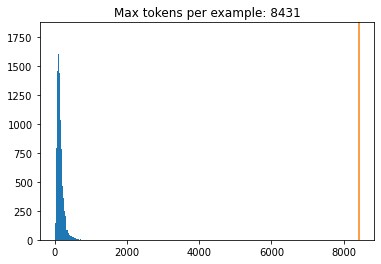

In [ ]:
all_lengths = np.concatenate(lengths)

plt.hist(all_lengths, np.linspace(0, 1000, 100))
plt.ylim(plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Max tokens per example: {max_length}');

